In [1]:
import mglearn
import numpy as np 
import pandas as pd 
import seaborn as sb 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter('ignore')

In [2]:
X,y = mglearn.datasets.make_forge()
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2) # defalult 75% 25% , 7:3

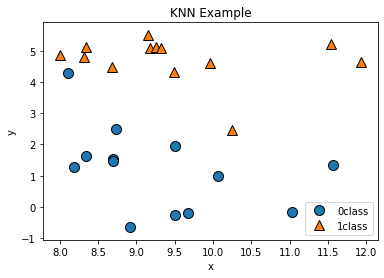

In [3]:
mglearn.discrete_scatter( X[:,0], X[:,1],  y )
plt.legend( ['0class','1class'])
plt.title('KNN Example') 
plt.xlabel('x') ; plt.ylabel('y')
plt.show()

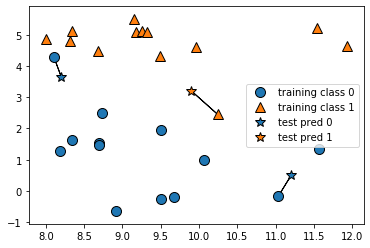

In [4]:
mglearn.plots.plot_knn_classification( n_neighbors=1 )

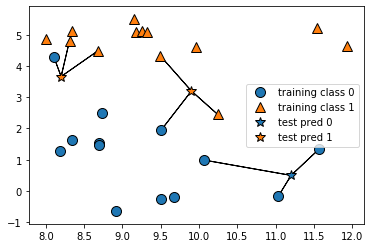

In [5]:
mglearn.plots.plot_knn_classification( n_neighbors=3 )

In [6]:
model_knn = KNeighborsClassifier( n_neighbors=1 )
model_knn.fit( x_train, y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [7]:
x_test

array([[ 9.50048972, -0.26430318],
       [10.06393839,  0.99078055],
       [ 8.30988863,  4.80623966],
       [11.54155807,  5.21116083],
       [ 9.67284681, -0.20283165],
       [ 9.49123469,  4.33224792]])

In [8]:
model_knn.predict( x_test )

array([0, 0, 1, 1, 0, 1])

In [9]:
y_test

array([0, 0, 1, 1, 0, 1])

In [10]:
model_knn.score( x_test, y_test )

1.0

In [11]:
param_value = { 'n_neighbors':[1,2,3,4,5] }
gridSearch = GridSearchCV( KNeighborsClassifier(), param_grid=param_value )
gridSearch.fit( x_train, y_train )

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [12]:
gridSearch.best_params_

{'n_neighbors': 3}

In [13]:
gridSearch.best_score_

0.9

In [14]:
gridSearch.best_estimator_.predict( x_test )

array([0, 0, 1, 1, 0, 1])